# Final Project Report

* Class: DS 5100
* Student Name: Finn Mokrzycki
* Student Net ID: qcp6az
* This URL: https://github.com/finnmok/DS5100-2024-06-R/tree/main/Final_Project/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project instructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/finnmok/DS5100-2024-06-R/blob/main/montecarlo/montecarlo.py

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```
import numpy as np
import pandas as pd
from collections import Counter
from itertools import combinations, permutations

class Die():
    """A class representing a die with customizable faces and weights.
    
    INPUT:
        faces (numpy.ndarray): An array of faces for the die. Must be strings or numbers.
        
    OUTPUT:
        A Die object with initialized faces and equal weights.
    """
    def __init__(self,faces):
        """Initializes the die with faces and default weights.
        
        INPUTS:
            faces (numpy.ndarray): An array of faces for the die. Must be strings or numbers.
        """
        # Takes a NumPy array of faces as an argument. Throws a TypeError if not a NumPy array.
        if not isinstance(faces, np.ndarray):
            raise TypeError("Must be a Numpy Array for Faces")
        
        # The array’s data type dtype may be strings or numbers
        if not (np.issubdtype(faces.dtype, np.number) or np.issubdtype(faces.dtype, np.str_) or np.issubdtype(faces.dtype, np.object_)):
            raise TypeError("Numpy Array Must be String or Numbers Datatypes")
        
        # The array’s values must be distinct. Tests to see if the values are distinct and raises a ValueError if not
        if np.unique(faces).shape[0] != faces.shape[0]:
            raise ValueError("Values Must be Distinct")
        
        self.__faces = faces
        
        # Internally initializes the weights to 1 for each face.
        self.__wts = np.ones(faces.shape[0])
        
        # Saves both faces and weights in a private data frame with faces in the index.
        self.__die_df = pd.DataFrame(
            data=self.__wts,
            index=self.__faces,
            columns = ['wt'])
        
    # Takes two arguments: the face value to be changed and the new weight.
    def set_wts(self,which_face,new_wt):
        """Sets the weight of a specified face.
        
        INPUTS:
            which_face: The face value to be changed. Face must exist in initialized faces
                Must be same datatype as element in face array
            new_wt: The new weight for the specified face. Must be numeric or castable as numeric
        """
        # Checks to see if the face passed is valid value, i.e. if it is in the die array. If not, raises an IndexError.
        if which_face not in self.__faces:
            raise IndexError("Invalid Value for Die Face")
        
        # Checks to see if the weight is a valid type, i.e. if it is numeric (integer or float) or castable as numeric. If not, raises a TypeError.
        try:
            new_wt = float(new_wt)
        except:
            raise ValueError("Updated Weight is Not a Valid Type")
            
        if new_wt < 0:
            raise ValueError("Value Must be Non-Negative")
        
        self.__die_df.loc[which_face,'wt'] = new_wt
        
    #Takes a parameter of how many times the die is to be rolled; defaults to 1                   
    def roll(self,n_rolls = 1):
        """Rolls the die a specified number of times.
        
        INPUT:
            n_rolls (int): The number of times to roll the die. Defaults to 1.
        
        OUTPUT:
            list: A list of outcomes from the rolls.
        """
        if isinstance(n_rolls,int) == False:
            raise TypeError("n_rolls must be an integer")
        
        #This is essentially a random sample with replacement, from the private die data frame, that applies the weights.
        
        # Returns a Python list of outcomes
        # Does not store internally these results
        return list(np.random.choice(
            a = self.__die_df.index.values,
            p = self.__die_df['wt']/self.__die_df['wt'].sum(),
            size=n_rolls) )
    
    def get_die_wts(self):
        """Retrieves the current weights of the die faces.
        
        OUTPUT:
            pandas.DataFrame: A DataFrame containing the weights of the die faces.
        """
        return self.__die_df.copy()
                     
class Game():
    """
    A class representing a game played with multiple dice.
    
    INPUT:
        die (list): A list of already instantiated Die objects.
        
    OUTPUT:
        A Game object with the initialized dice.
    """
    # Takes a single parameter, a list of already instantiated similar dice.
    def __init__(self,dice):
        """
        Initializes the game with a list of dice.
        
        INPUT:
            dice (list): A list of already instantiated Die objects.
        """
        # Ideally this would check if the list actually contains Die objects
        if isinstance(dice,list) != True:
            get_die = list()
            get_die.append(dice)
        if not all([isinstance(d,Die) for d in dice]):
            raise TypeError("All Dice Must be Dice Type")
        # and that they all have the same faces, but this is not required for this project.
        if len(dice) > 1:
            if all([all(dice[i].get_die_wts().index == dice[i+1].get_die_wts().index) for i in range(len(dice)-1)]) == False:
                raise IndexError("All Dice Must Have the Same Faces")
        self.dice = dice
    
    # Takes an integer parameter to specify how many times the dice should be rolled.
    def play(self, n_rolls):
        """
        Rolls the dice a specified number of times and saves the results.
        
        INPUT:
            n_rolls (int): The number of times the dice should be rolled.
        """
        # Saves the result of the play to a private data frame.
        #The data frame should be in wide format
        self.__play_df = pd.DataFrame(
            # i.e. have the roll number as a named index,
            columns = range(n_rolls),
            # columns for each die number (using its list index as the column name)
            index = range(len(self.dice)),
            # and the face rolled in that instance in each cell.
            data = [d.roll(n_rolls) for d in self.dice])
        
        self.__play_df.columns.names = ['roll_number']
        self.__play_df.index.names = ['die_number']
        self.__play_df = self.__play_df.T
        
    # This method just returns a copy of the private play data frame to the user.
    # Takes a parameter to return the data frame in narrow or wide form which defaults to wide form.
    def get_most_recent_play(self,form='wide'):
        """
        Returns the most recent play results in the specified format.
        
        INPUT:
            form (str): The format of the returned data frame. Must be 'wide' or 'narrow'. Defaults to 'wide'.
        
        OUTPUT:
            pandas.DataFrame: A DataFrame containing the results of the most recent play.
        """
        if form == 'wide':
            return self.__play_df
        elif form == 'narrow':
            # The narrow form will have a MultiIndex, comprising the roll number and the die number (in that order), and a single column with the outcomes (i.e. the face rolled).
            return self.__play_df.reset_index().melt(
                id_vars='roll_number',
                var_name='die_number',
                value_name='face_rolled').set_index(['roll_number','die_number']).copy()
        else:
            # This method should raise a ValueError if the user passes an invalid option for narrow or wide.
            raise ValueError("Form for Play Data is Invalid")
        
    
class Analyzer():
    """
    A class for analyzing the results of a game played with multiple dice.
    
    INPUT:
        game (Game): A Game object to be analyzed.
        
    OUTPUT:
        An Analyzer object for the specified game.
    """
    def __init__(self,game):
        """
        Initializes the analyzer with a game object.
        
        INPUT:
            game (Game): A Game object to be analyzed.
        """
        if not isinstance(game,Game):
            # Takes a game object as its input parameter. Throw a ValueError if the passed value is not a Game object.
            raise ValueError("Passed Value Not a Game Object")
        
        self.game = game
    
    def jackpot_count(self):
        """
        Computes how many times the game resulted in a jackpot.
        
        OUTPUTS:
            int: The number of jackpots.
        """
        # Computes how many times the game resulted in a jackpot.
        # Returns an integer for the number of jackpots.
        return sum([self.game.get_most_recent_play().iloc[n,:].nunique() == 1 for n in range(len(self.game.get_most_recent_play()))])
    
    def face_count(self):
        """
        Computes number of times a given face is rolled in each event.
        
        OUTPUTS:
            pandas.DataFrame: A DataFrame with roll numbers as index, face values as columns, and count values in the cells.
        """
        # Computes how many times a given face is rolled in each event. For example, if a roll of five dice has all sixes, then the counts for this roll would be 5 for the face value 6 and 0 for the other faces.
        # Returns a data frame of results.
        # The data frame has an index of the roll number, face values as columns, and count values in the cells (i.e. it is in wide format).
        return self.game.get_most_recent_play().apply(lambda row: row.value_counts().reindex(self.game.dice[0].get_die_wts().index).fillna(0).astype(int), axis=1)
    
    #Computes the distinct combinations of faces rolled, along with their counts.
    def combination_count(self):
        """
        Computes the distinct combinations of faces rolled, along with their counts.
        
        OUTPUT:
            pandas.DataFrame: A DataFrame with a MultiIndex of distinct combinations and a column for the associated counts.
        """
        cts = dict(
            sum(
                [Counter(combinations(roll,len(self.game.dice))) for roll in self.game.get_most_recent_play().values],
                Counter()
            )
        )

        # Returns a data frame of results.
        #The data frame should have an MultiIndex of distinct combinations and a column for the associated counts.
        return pd.DataFrame(
            index=cts.keys(),
            data=cts.values()
        ).sort_index().rename({0:"n_combinations"},axis=1)
    
    # Computes the distinct permutations of faces rolled, along with their counts.
    def permutation_count(self):
        """
        Computes the distinct permutations of faces rolled, along with their counts.
        
        OUTPUT:
            pandas.DataFrame: A DataFrame with a MultiIndex of distinct permutations and a column for the associated counts.
        """
        cts = dict(
            sum(
                [Counter(permutations(roll,len(self.game.dice))) for roll in self.game.get_most_recent_play().values],
                Counter()
            )
        )
        # Returns a data frame of results.
        #The data frame should have an MultiIndex of distinct permutations and a column for the associated counts.
        return pd.DataFrame(
            index=cts.keys(),
            data=cts.values()
        ).sort_index().rename({0:"n_permutations"},axis=1)

```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
import unittest
import numpy as np
import pandas as pd
# from montecarlo.montecarlo import *
import montecarlo.montecarlo as mc

class MonteCarloTestDie(unittest.TestCase):

    def test_1_faces_isnt_numpy(self):
        """
        Check that input for faces is numpy array (input = list)
        """
        faces = ['a','b','c']
        with self.assertRaises(TypeError):
            mc.Die(faces)

    def test_2_faces_is_numpy(self):
        """
        Check that input for faces is numpy array (input = numpy array)
        """
        faces = np.array(['a','b','c'])
        try:
            mc.Die(faces)
        except TypeError:
            self.fail("Correct Input Numpy Array Resulting in Error")
    
    def test_3_faces_dtype_incorrect(self):
        """
        Check that input for faces is a string or number datatype (input = array with a dictionary)
        """
        faces = np.array(['a',1,'c',{'dictionary':'value'}])
        
        with self.assertRaises(TypeError):
            mc.Die(faces)

    def test_4_faces_dtype_correct(self):
        """
        Check that input for faces is a string or number datatype (input = array with strings and numerics)
        """
        faces = np.array(['a',1,'c',2.0])
        try:
            mc.Die(faces)
        except TypeError:
            self.fail("Correct Inputs Result in Error")

    def test_5_faces_not_unique(self):
        """
        Check that input for faces are unique values
        """
        faces = np.array([1,2,3,4,4])
        with self.assertRaises(ValueError):
            mc.Die(faces)

    def test_6_faces_unique(self):
        """
        Check that input for faces are unique values
        """
        faces = np.array([1,2,3])
        try:
            mc.Die(faces)
        except:
            self.fail("Values Unique and Resulting in Error")

    def test_7_set_wts_invalid_face(self):
        """Check setting weight for a face that doesn't exist"""
        faces = np.array([1, 2, 3])
        die = mc.Die(faces)
        with self.assertRaises(IndexError):
            die.set_wts(6, 2.0)

    def test_8_set_wts_invalid_weight(self):
        """Check setting weight to a non-numeric value"""
        faces = np.array([1, 2, 3])
        die = mc.Die(faces)
        with self.assertRaises(ValueError):
            die.set_wts(1, 'invalid')

    def test_9_set_wts_negative_weight(self):
        """Check setting weight to a negative value"""
        faces = np.array([1, 2, 3])
        die = mc.Die(faces)
        with self.assertRaises(ValueError):
            die.set_wts(1, -1.0)

    def test_10_set_wts_valid(self):
        """Check setting weight to a valid numeric value"""
        faces = np.array([1, 2, 3])
        die = mc.Die(faces)
        try:
            die.set_wts(1, 2.0)
        except:
            self.fail("Setting weight failed with valid inputs")

    def test_11_roll_invalid_n_rolls(self):
        """Check rolling die with non-integer number of rolls"""
        faces = np.array([1, 2, 3])
        die = mc.Die(faces)
        with self.assertRaises(TypeError):
            die.roll('invalid')

    def test_12_roll_valid_n_rolls(self):
        """Check rolling die with valid number of rolls"""
        faces = np.array([1, 2, 3])
        die = mc.Die(faces)
        try:
            die.roll(10)
        except:
            self.fail("Rolling the die failed with valid inputs")

    def test_13_get_die_wts(self):
        """Check getting die weights"""
        faces = np.array([1, 2, 3])
        die = mc.Die(faces)
        self.assertTrue(isinstance(die.get_die_wts(), pd.DataFrame))



class MonteCarloTestGame(unittest.TestCase):

    def setUp(self):
        self.die1 = mc.Die(np.array([1, 2, 3]))
        self.die2 = mc.Die(np.array([1, 2, 3]))

    def test_1_not_dice(self):
        """Check intial setting game with invalid dice list"""
        with self.assertRaises(TypeError):
            mc.Game(["not a die"])

    def test_2_init_different_faces(self):
        """Check initial setting game with different faced dice"""
        die3 = mc.Die(np.array([1, 2, 4]))
        with self.assertRaises(IndexError):
            mc.Game([self.die1, die3])

    def test_3_init_valid_dice(self):
        """Check list of dice in game object"""
        try:
            self.game = mc.Game([self.die1, self.die2])
        except:
            self.fail("Valid Dice in List Resulting in Error")

    def test_4_play_invalid_n_rolls(self):
        """Check playing game with non-integer number of rolls"""
        self.game = mc.Game([self.die1, self.die2])
        with self.assertRaises(TypeError):
            self.game.play("invalid")

    def test_5_play_valid_n_rolls(self):
        """Check playing game with valid number of rolls"""
        self.game = mc.Game([self.die1, self.die2])
        try:
            self.game.play(10)
        except:
            self.fail("Playing game failed with valid inputs")

    def test_6_invalid_form_most_recent_play(self):
        """Check retrieving play results with invalid form"""
        self.game = mc.Game([self.die1, self.die2])
        self.game.play(10)
        with self.assertRaises(ValueError):
            self.game.get_most_recent_play(form="WideOrNarrow")

    def test_7_valid_form_most_recent_play(self):
        """Check retrieving play results with valid form"""
        self.game = mc.Game([self.die1, self.die2])
        self.game.play(10)
        try:
            self.game.get_most_recent_play(form="wide")
            self.game.get_most_recent_play(form="narrow")
        except:
            self.fail("Retrieving play results failed with valid inputs")

class MonteCarloTestAnalyzer(unittest.TestCase):

    def setUp(self):
        self.die1 = mc.Die(np.array([1, 2, 3, 4, 5, 6]))
        self.die2 = mc.Die(np.array([1, 2, 3, 4, 5, 6]))
        self.game = mc.Game([self.die1, self.die2])
        self.game.play(10)

    def test_1_invalid_game(self):
        """Check initialization with invalid game object"""
        with self.assertRaises(ValueError):
            mc.Analyzer(self.die1)

    def test_2_valid_game(self):
        """Check initialization with valid game object"""
        try:
            mc.Analyzer(self.game)
        except:
            self.fail("Initializing Analyzer failed with valid inputs")
    
    def test_3_jackpot_count(self):
        """Check computing jackpot count"""
        self.analyzer = mc.Analyzer(self.game)
        try:
            self.analyzer.jackpot_count()
        except:
            self.fail("Computing jackpot count failed")

    def test_4_face_count(self):
        """Check face count"""
        self.analyzer = mc.Analyzer(self.game)
        try:
            self.analyzer.face_count()
        except:
            self.fail("Computing face count failed")

    def test_5_combination_count(self):
        """Check combination count"""
        self.analyzer = mc.Analyzer(self.game)
        try:
            self.analyzer.combination_count()
        except:
            self.fail("Computing combination count failed")

    def test_6_permutation_count(self):
        """Check permutation count"""
        self.analyzer = mc.Analyzer(self.game)
        try:
            self.analyzer.permutation_count()
        except:
            self.fail("Computing permutation count failed")
    

if __name__ == '__main__':
    unittest.main(verbosity=3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```
test_1_invalid_game (__main__.MonteCarloTestAnalyzer)
Check initialization with invalid game object ... ok
test_2_valid_game (__main__.MonteCarloTestAnalyzer)
Check initialization with valid game object ... ok
test_3_jackpot_count (__main__.MonteCarloTestAnalyzer)
Check computing jackpot count ... ok
test_4_face_count (__main__.MonteCarloTestAnalyzer)
Check face count ... ok
test_5_combination_count (__main__.MonteCarloTestAnalyzer)
Check combination count ... ok
test_6_permutation_count (__main__.MonteCarloTestAnalyzer)
Check permutation count ... ok
test_10_set_wts_valid (__main__.MonteCarloTestDie)
Check setting weight to a valid numeric value ... ok
test_11_roll_invalid_n_rolls (__main__.MonteCarloTestDie)
Check rolling die with non-integer number of rolls ... ok
test_12_roll_valid_n_rolls (__main__.MonteCarloTestDie)
Check rolling die with valid number of rolls ... ok
test_13_get_die_wts (__main__.MonteCarloTestDie)
Check getting die weights ... ok
test_1_faces_isnt_numpy (__main__.MonteCarloTestDie)
Check that input for faces is numpy array (input = list) ... ok
test_2_faces_is_numpy (__main__.MonteCarloTestDie)
Check that input for faces is numpy array (input = numpy array) ... ok
test_3_faces_dtype_incorrect (__main__.MonteCarloTestDie)
Check that input for faces is a string or number datatype (input = array with a dictionary) ... ok
test_4_faces_dtype_correct (__main__.MonteCarloTestDie)
Check that input for faces is a string or number datatype (input = array with strings and numerics) ... ok
test_5_faces_not_unique (__main__.MonteCarloTestDie)
Check that input for faces are unique values ... ok
test_6_faces_unique (__main__.MonteCarloTestDie)
Check that input for faces are unique values ... ok
test_7_set_wts_invalid_face (__main__.MonteCarloTestDie)
Check setting weight for a face that doesn't exist ... ok
test_8_set_wts_invalid_weight (__main__.MonteCarloTestDie)
Check setting weight to a non-numeric value ... ok
test_9_set_wts_negative_weight (__main__.MonteCarloTestDie)
Check setting weight to a negative value ... ok
test_1_not_dice (__main__.MonteCarloTestGame)
Check intial setting game with invalid dice list ... ok
test_2_init_different_faces (__main__.MonteCarloTestGame)
Check initial setting game with different faced dice ... ok
test_3_init_valid_dice (__main__.MonteCarloTestGame)
Check list of dice in game object ... ok
test_4_play_invalid_n_rolls (__main__.MonteCarloTestGame)
Check playing game with non-integer number of rolls ... ok
test_5_play_valid_n_rolls (__main__.MonteCarloTestGame)
Check playing game with valid number of rolls ... ok
test_6_invalid_form_most_recent_play (__main__.MonteCarloTestGame)
Check retrieving play results with invalid form ... ok
test_7_valid_form_most_recent_play (__main__.MonteCarloTestGame)
Check retrieving play results with valid form ... ok
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successfully imported (1).

In [1]:
import sys
import os

cur_dir = os.getcwd()
montecarlo_path = os.path.abspath(os.path.join(os.path.dirname(cur_dir), 'montecarlo'))
sys.path.append(montecarlo_path)

In [4]:
# e.g. import montecarlo.montecarlo 
import montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [5]:
help(montecarlo)

Help on module montecarlo:

NAME
    montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  A class for analyzing the results of a game played with multiple dice.
     |  
     |  INPUT:
     |      game (Game): A Game object to be analyzed.
     |      
     |  OUTPUT:
     |      An Analyzer object for the specified game.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Initializes the analyzer with a game object.
     |      
     |      INPUT:
     |          game (Game): A Game object to be analyzed.
     |  
     |  combination_count(self)
     |      Computes the distinct combinations of faces rolled, along with their counts.
     |      
     |      OUTPUT:
     |          pandas.DataFrame: A DataFrame with a MultiIndex of distinct combinations and a column for the associated counts.
     |  
     |  face_count(self)
     |      Com

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/finnmok/DS5100-2024-06-R/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

In [6]:
# Pasted code
!pip install git+https://github.com/finnmok/DS5100-2024-06-R.git

  Cloning https://github.com/finnmok/DS5100-2024-06-R.git to c:\users\finnr\appdata\local\temp\pip-req-build-iqtz651d
  Resolved https://github.com/finnmok/DS5100-2024-06-R.git to commit e628e6cbb6823750f955a7909a64fd84f2c84181
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for montecarlo: filename=montecarlo-1.0-py3-none-any.whl size=5320 sha256=dc0adfc4bb4a435228bb350f2166f41ba9e69f9ad65c40c8682040305f58be79
  Stored in directory: C:\Users\finnr\AppData\Local\Temp\pip-ephem-wheel-cache-a412sbe0\wheels\8b\34\32\c94b0ca9c1ce08690fdc2a9a55a3cf2b0a0a17f0ec520b574f
Successfully built montecarlo


  Running command git clone --filter=blob:none --quiet https://github.com/finnmok/DS5100-2024-06-R.git 'C:\Users\finnr\AppData\Local\Temp\pip-req-build-iqtz651d'

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\finnr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

In [9]:
import numpy as np
import pandas as pd

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [37]:
coin_good = montecarlo.Die(np.array(['H','T']))
coin_bad = montecarlo.Die(np.array(['H','T']))
coin_bad.set_wts('H',5)

In [38]:
coin_good.get_die_wts()

,wt
H,1.0
T,1.0


In [39]:
coin_bad.get_die_wts()

,wt
H,5.0
T,1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correctly and without error (1).

In [41]:
game_good = montecarlo.Game([coin_good,coin_good])

In [52]:
game_good.play(1000)
game_good.get_most_recent_play()

die_number,0,1
roll_number,,
0,T,T
1,T,T
2,H,T
3,T,H
4,T,T
...,...,...
995,T,T
996,T,T
997,T,T


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correctly and without error (1).

In [46]:
game_bad = montecarlo.Game([coin_bad,coin_bad,coin_good])

In [51]:
game_bad.play(1000)
game_bad.get_most_recent_play()

die_number,0,1,2
roll_number,,,
0,H,H,T
1,H,H,T
2,H,H,H
3,H,H,H
4,H,H,T
...,...,...,...
995,H,H,T
996,H,H,T
997,H,H,H


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objects instantiated for both games (1).
- Raw frequencies reported for both (1).

In [53]:
analyzer_good = montecarlo.Analyzer(game_good)
analyzer_bad = montecarlo.Analyzer(game_bad)

In [54]:
analyzer_good.jackpot_count()

514

In [55]:
analyzer_bad.jackpot_count()

333

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [59]:
good_freq = analyzer_good.jackpot_count() / 1000
good_freq

0.514

In [60]:
bad_freq = analyzer_bad.jackpot_count() / 1000
bad_freq

0.333

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

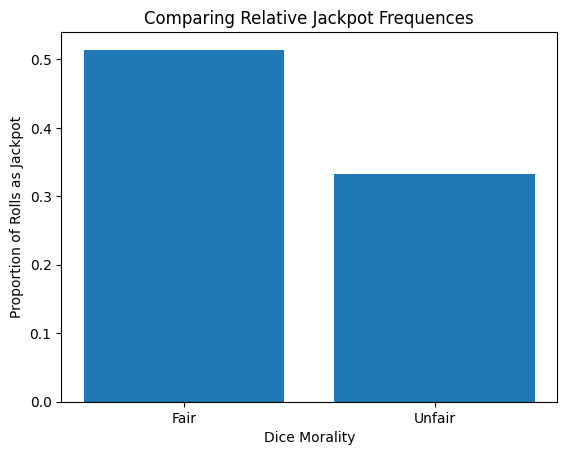

In [67]:
import matplotlib.pyplot as plt

plt.bar(['Fair','Unfair'],[good_freq,bad_freq])
plt.title("Comparing Relative Jackpot Frequences")
plt.xlabel("Dice Morality")
plt.ylabel("Proportion of Rolls as Jackpot");

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [68]:
die1 = montecarlo.Die(np.array([1,2,3,4,5,6]))
die2 = montecarlo.Die(np.array([1,2,3,4,5,6]))
die3 = montecarlo.Die(np.array([1,2,3,4,5,6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [71]:
die1.set_wts(6,5)

In [72]:
die1.get_die_wts()

,wt
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [73]:
die2.set_wts(1,5)

In [74]:
die2.get_die_wts()

,wt
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [76]:
new_game = montecarlo.Game([die3,die3,die3,die3,die3])

In [78]:
new_game.play(10000)

In [132]:
new_game.get_most_recent_play()

die_number,0,1,2,3,4
roll_number,,,,,
0,2,3,6,3,5
1,5,2,2,1,5
2,6,3,3,5,5
3,6,1,6,2,2
4,6,1,1,1,6
...,...,...,...,...,...
9995,3,5,4,1,4
9996,2,2,2,2,3
9997,4,4,5,1,3


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [79]:
new_game_bad = montecarlo.Game([die1,die2,die3,die3,die3])

In [80]:
new_game_bad.play(10000)

In [133]:
new_game_bad.get_most_recent_play()

die_number,0,1,2,3,4
roll_number,,,,,
0,6,1,2,2,6
1,2,1,5,6,2
2,2,1,4,3,3
3,6,2,3,3,1
4,6,5,1,2,1
...,...,...,...,...,...
9995,1,5,1,3,4
9996,3,1,4,3,4
9997,3,1,6,1,5


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [81]:
analyzer_new = montecarlo.Analyzer(new_game)
analyzer_new_bad = montecarlo.Analyzer(new_game_bad)


In [83]:
good_freq = analyzer_new.jackpot_count() / 1000
good_freq

0.006

In [82]:
bad_freq = analyzer_new_bad.jackpot_count() / 1000
bad_freq

0.009

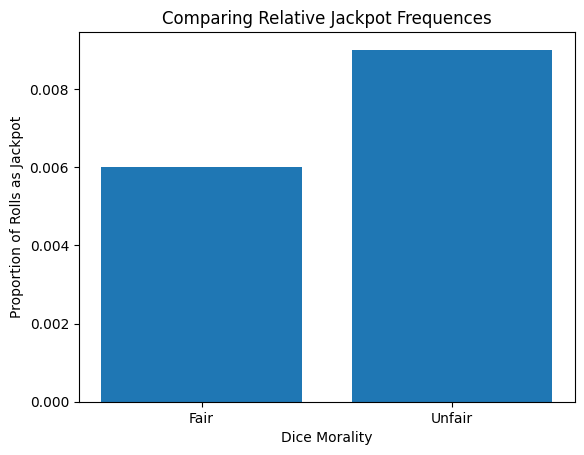

In [84]:
import matplotlib.pyplot as plt

plt.bar(['Fair','Unfair'],[good_freq,bad_freq])
plt.title("Comparing Relative Jackpot Frequences")
plt.xlabel("Dice Morality")
plt.ylabel("Proportion of Rolls as Jackpot");

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [126]:
f = open('english_letters.txt', "r")
letter_lst = f.read().split('\n')
faces = {letter.split(' ')[0]:int(letter.split(' ')[1]) for letter in letter_lst}

In [127]:
get_faces = np.array(list(faces.keys()))
letter_die = montecarlo.Die(get_faces)

In [ ]:
[letter_die.set_wts(k,v) for k,v in faces.items()]

In [129]:
letter_die.get_die_wts()

,wt
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0
L,183996130.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [134]:
letter_game = montecarlo.Game(np.array([letter_die,letter_die,letter_die,letter_die]))
letter_game.play(1000)

In [135]:
letter_game.get_most_recent_play()

die_number,0,1,2,3
roll_number,,,,
0,L,I,O,S
1,I,A,T,T
2,T,D,T,U
3,R,D,M,I
4,N,I,E,A
...,...,...,...,...
995,K,O,N,E
996,E,C,F,I
997,Y,A,S,B


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [141]:
scrabble = open('scrabble_words.txt', "r")
word_lst = scrabble.read().split('\n')
scrabble_analysis = montecarlo.Analyzer(letter_game)

In [178]:
scrabble_analysis.permutation_count()

n_permutations
A A A H               6
      I               6
    B S               2
      U               2
    C F               2
...                 ...
Z R M A               1
  T I K               1
    K I               1
  W M N               1
    N M               1

[17402 rows x 1 columns]

In [170]:
df = scrabble_analysis.permutation_count().reset_index()
df['word'] = df['level_0'] + df['level_1'] + df['level_2'] + df['level_3']

In [177]:
df[df['word'].isin(word_lst)].shape[0]

887

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [179]:
letter_game = montecarlo.Game(np.array([letter_die,letter_die,letter_die,letter_die,letter_die]))
letter_game.play(1000)
letter_game.get_most_recent_play()

die_number,0,1,2,3,4
roll_number,,,,,
0,P,I,A,A,R
1,E,S,H,T,P
2,V,R,A,L,S
3,H,E,Y,L,T
4,E,N,F,A,A
...,...,...,...,...,...
995,X,E,N,T,N
996,H,Y,O,S,O
997,O,E,I,F,D


In [180]:
scrabble_analysis = montecarlo.Analyzer(letter_game)

In [181]:
scrabble_analysis.permutation_count()

n_permutations
A A A D S               6
      E S               6
      I W               6
      S D               6
        E               6
...                   ...
Z Y N V S               1
    S N V               1
      V N               1
    V N S               1
      S N               1

[83865 rows x 1 columns]

In [182]:
df = scrabble_analysis.permutation_count().reset_index()
df['word'] = df['level_0'] + df['level_1'] + df['level_2'] + df['level_3'] + df['level_4']

In [184]:
df[df['word'].isin(word_lst)].shape[0]

629

The game with only four dice result in more real words than the game with five dice.